<center> 
    <h1>
        Network Analysis Project
    </h1>
    <h2>
        Social Network Management
    </h2>
    <h2>
        Mahmoud KOBBI
           </h2>
    <h2>
        Paris-Saclay University, Paris, France
            </h2>
    <h2>
        Feb. 09, 2018
    </h2>

</center>

## Setting the environment

### Installing requirements

In [1]:
!pip install -r  requirements.txt

### Imports

In [2]:
from __future__ import division

import collections
import gzip
from StringIO import StringIO
from urllib import urlopen

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
from community import community_louvain as community
%matplotlib inline

### Generating colors

In [4]:
colors = plt.cm.colors._colors_full_map.keys()
colors = [str(x) for x in colors]

## Analysis

### Graph Loading

In [5]:
url = 'http://snap.stanford.edu/data/facebook_combined.txt.gz'
#url = 'https://github.com/AllenDowney/ThinkComplexity2/blob/master/code/facebook_combined.txt.gz?raw=true'
inmemory = StringIO(urlopen(url).read())
with gzip.GzipFile(fileobj=inmemory, mode='rb') as f:
    G = nx.read_edgelist(f, nodetype=int)

### Minimum Requirements

#### Number of nodes and edges

In [6]:
L = len(G.edges())
N = len(G.nodes())
print 'Number of vertices N =  ', N, "\nNumber of edges L = ", L

Number of vertices N =   4039 
Number of edges L =  88234


#### Graph plotting

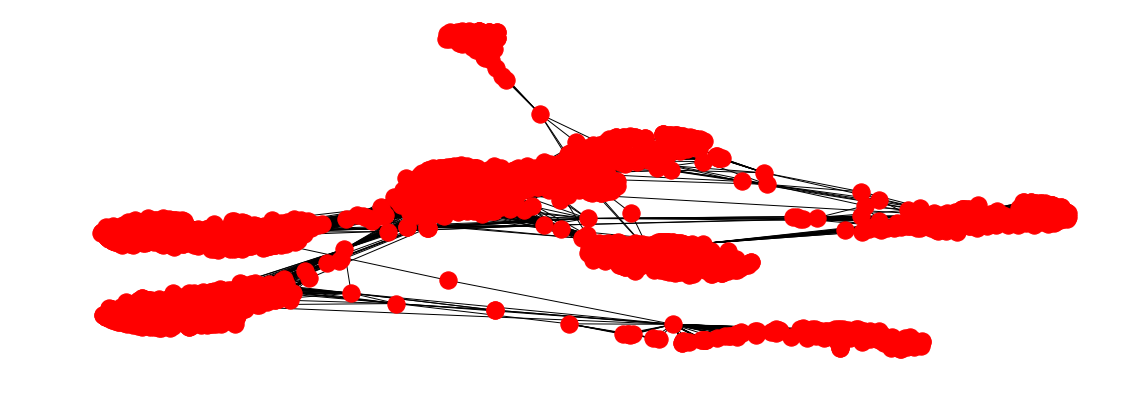

In [6]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
nx.draw(G, with_labels=False)
plt.show()

#### Degrees

##### Real network $\mathcal{G}$

###### Degree sequence generation

In [7]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
g_deg_avg = 2*L/N

###### Degree histogram plotting

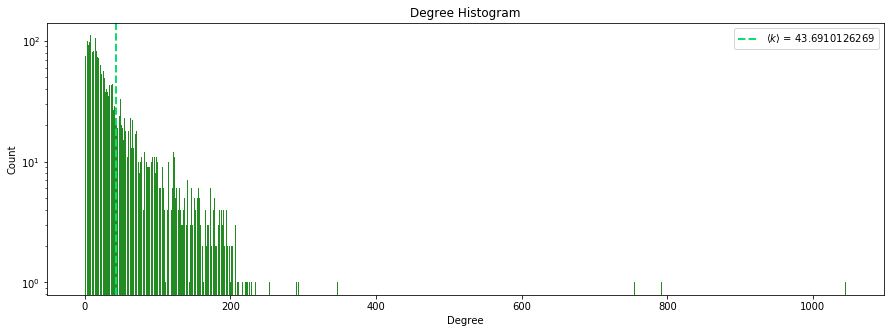

In [8]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color=random.choice(colors), log=True)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#plt.set_xticks([d + 0.4 for d in deg])
#plt.set_xticklabels(deg)
g_deg_line = plt.axvline(g_deg_avg, color=random.choice(colors), 
                       linestyle='dashed', linewidth=2, 
                       label=r'$\langle k \rangle$ = '+str(g_deg_avg))
plt.legend(handles=[g_deg_line])
plt.show()

In [9]:
print 'Average degree is equal to <k> =', g_deg_avg

Average degree is equal to <k> = 43.6910126269


##### Random network $\mathcal{R}$ 

###### $\mathcal{R}$ generation

Let $\mathcal{R}$ be an Erdos-Reyni graph of same numbers of nodes $N$ and edges $L$

In [7]:
R = nx.gnm_random_graph(n=N, m=L, seed=42, directed=False)

In [11]:
r_deg_avg = 2*L/N #parce que le graphe est non oriente => les liens comptent double {(i,j), (j,i)}
p = g_deg_avg/(N-1)
print "Average degree <k> = ", r_deg_avg, "\nProbabilty p = ", p

Average degree <k> =  43.6910126269 
Probabilty p =  0.0108199635034


###### $\mathcal{R}$ degree sequence

In [12]:
rnd_degree_sequence = sorted([d for n, d in R.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
rnd_degreeCount = collections.Counter(rnd_degree_sequence)
rnd_deg, cnt = zip(*rnd_degreeCount.items())

###### $\mathcal{R}$ degree histogram

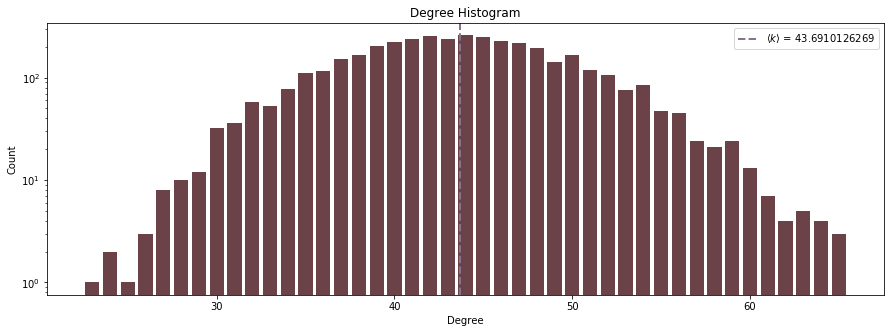

In [13]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

avg = 2*L/N
#fig, ax = plt.subplots()
plt.bar(rnd_deg, cnt, width=0.80, color=random.choice(colors), log=True)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in rnd_deg])
#ax.set_xticklabels(rnd_deg)
line = plt.axvline(avg, color=random.choice(colors), linestyle='dashed', linewidth=2, 
                   label=r'$\langle k \rangle$ = '+str(avg))
plt.legend(handles=[line])
plt.show()

#### Clustering coefficient

##### Real network $\mathcal{R}$

###### Clustering coefficients sequence

In [14]:
clust_coefficients = nx.clustering(G)
clustering_sequence = sorted(list(clust_coefficients.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
clusteringCount = collections.Counter(clustering_sequence)
clus, cnt = zip(*clusteringCount.items())

avg_clust=sum(clust_coefficients.values()) / len(clust_coefficients)

##### Clustering coefficients histogram

0.60554671862


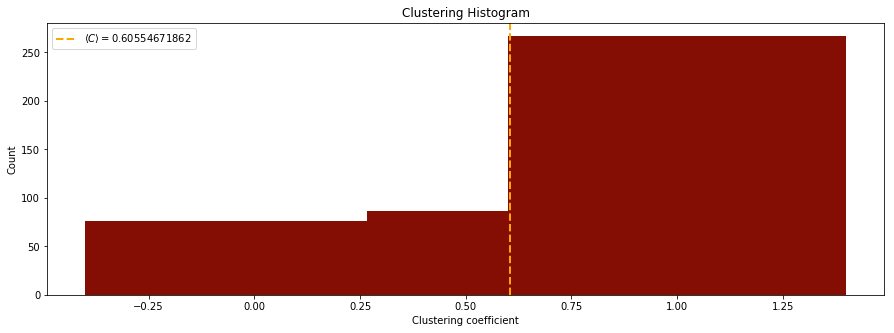

In [15]:
print avg_clust

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(clus, cnt, width=0.80, color=random.choice(colors), log=False)
#plt.scatter(clus, cnt)
plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
line = plt.axvline(avg_clust, color=random.choice(colors), linestyle='dashed', linewidth=2,
           label=r'$\langle C \rangle = $' + str(avg_clust))
plt.legend(handles=[line])
plt.show()

##### Random network $\mathcal{R}$

###### Clustering coefficients sequence

In [16]:
clust_coefficients = nx.clustering(R)
clustering_sequence = sorted(list(clust_coefficients.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
clusteringCount = collections.Counter(clustering_sequence)
clus, cnt = zip(*clusteringCount.items())

avg_clust=sum(clust_coefficients.values()) / len(cnt)

###### Clustering coefficients histogram

<C> =  0.088515210093


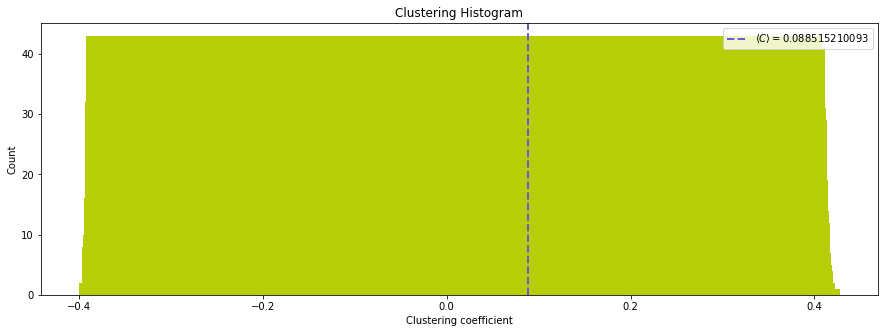

In [17]:
print '<C> = ', avg_clust

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(clus, cnt, color=random.choice(colors), width=0.80, log=False)

plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
line = plt.axvline(avg_clust, color=random.choice(colors), linestyle='dashed', linewidth=2,
                  label = r'$\langle C \rangle = $' + str(avg_clust)) 
plt.legend(handles=[line])
plt.show()

#### Distance

##### Real network $\mathcal{G}$

###### Distances calculation

In [18]:
path = dict(nx.shortest_path_length(G)) 

In [19]:
reform = {(outerKey, innerKey): values for outerKey, innerDict in path.iteritems() for innerKey, values in innerDict.iteritems()}

df = pd.Series(reform).rename_axis(['src', 'target']).reset_index(name='path')

In [20]:
avg_dist = nx.average_shortest_path_length(G)

diameter = nx.diameter(G)

In [21]:
avg_dist = np.mean(df['path'])
diameter = np.max(df['path'])

In [22]:
distance = sorted(list(reform.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
distCount = collections.Counter(distance)
dist, cnt = zip(*distCount.items())

#avg_dist= np.mean(dist)
print '<d> = ', avg_dist, '\ndmax = ', diameter

<d> =  3.691592636562027 
dmax =  8


###### Distances histogram

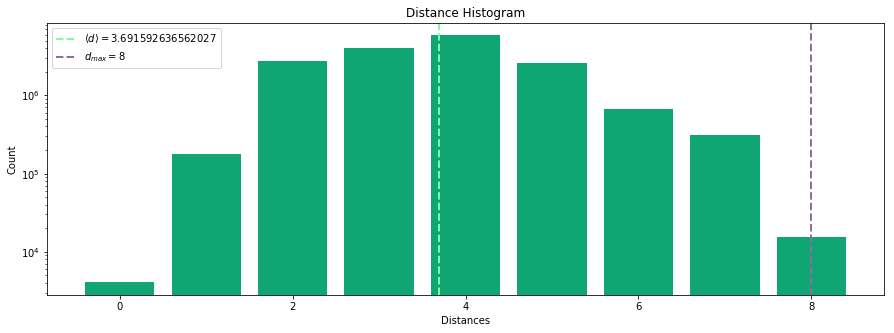

In [23]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(dist, cnt, width=0.80, color=random.choice(colors), log=True)

plt.title("Distance Histogram")
plt.ylabel("Count")
plt.xlabel("Distances")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
line_avg = plt.axvline(avg_dist, color=random.choice(colors), linestyle='dashed', linewidth=2,
                      label = r'$\langle d \rangle = $' + str(avg_dist))
line_diameter = plt.axvline(diameter, color=random.choice(colors), linestyle='dashed', linewidth=2,
                      label = r'$d_{max} = $' + str(diameter))
plt.legend(handles=[line_avg, line_diameter])
plt.show()

###### Ultra-small world property

In [24]:
print avg_dist/(np.log(N)/np.log(np.log(N)))

0.9410229821326926


##### Random network $\mathcal{R}$

###### Distances calculation

In [25]:
r_path = dict(nx.shortest_path_length(R)) 

In [26]:
r_reform = {(outerKey, innerKey): values for outerKey, innerDict in r_path.iteritems() for innerKey, values in innerDict.iteritems()}
r_df = pd.Series(reform).rename_axis(['src', 'target']).reset_index(name='path')

In [27]:
r_avg_dist = nx.average_shortest_path_length(R)
r_diameter = nx.diameter(R)

In [28]:
r_avg_dist = np.mean(r_df['path'])
r_diameter = np.max(r_df['path'])

In [29]:
r_distance = sorted(list(r_reform.values()), reverse=True)  # degree sequence
#print "clustering sequence", clustering_sequence
r_distCount = collections.Counter(r_distance)
r_dist, r_cnt = zip(*r_distCount.items())

#avg_dist= np.mean(dist)
print '<d> = ', r_avg_dist, '\ndmax = ', r_diameter

<d> =  3.691592636562027 
dmax =  8


###### Distances histogram

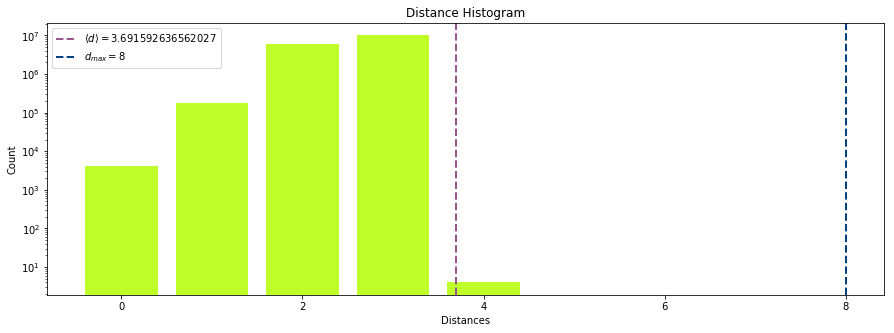

In [30]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.bar(r_dist, r_cnt, width=0.80, color=random.choice(colors), log=True)

plt.title("Distance Histogram")
plt.ylabel("Count")
plt.xlabel("Distances")
#ax.set_xticks([d + 0.4 for d in clus])
#ax.set_xticklabels(clus)
line_avg = plt.axvline(r_avg_dist, color=random.choice(colors), linestyle='dashed', linewidth=2,
                      label = r'$\langle d \rangle = $' + str(r_avg_dist))
line_diameter = plt.axvline(r_diameter, color=random.choice(colors), linestyle='dashed', linewidth=2,
                      label = r'$d_{max} = $' + str(r_diameter))
plt.legend(handles=[line_avg, line_diameter])
plt.show()

###### Ultra-small world property

In [31]:
print r_avg_dist/np.log(np.log(N))

1.744025859763983


### Extra requirements

#### Communities

In [32]:
#first compute the best partition
partition = community.best_partition(G)

In [33]:
len(np.unique(partition.values()))

16

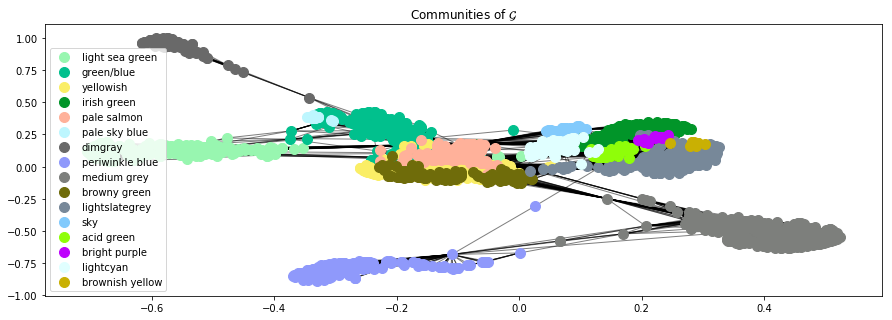

In [34]:
#drawing
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
draw_nodes=[]
for com in set(partition.values()) :
    count = count + 1.
    node_color=random.choice(colors)
    label = str(node_color).split(':', 1)[-1]
    #print (str(count/size))
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    draw_nodes.append(nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 100,
                                node_color=node_color, label = label))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.legend(handles = draw_nodes)
plt.title(r'Communities of $\mathcal{G}$')
plt.show()

#### Triangles

In [35]:
g_triangles = np.sum(nx.triangles(G).values())
r_triangles =  np.sum(nx.triangles(R).values()) 
print 'G has ', g_triangles, 'triangles\nR has ', r_triangles, 'triangles'

G has  4836030 triangles
R has  41127 triangles


#### Centrality measures

##### Betweenness

###### Computation

In [36]:
centrality = nx.betweenness_centrality(G, normalized=True, seed=42)
r_centrality = nx.betweenness_centrality(R, normalized=True, seed=42)

In [37]:
center, cnt = zip(*centrality.items())
r_center, r_cnt = zip(*r_centrality.items())
central_node = max(centrality, key=centrality.get)
r_central_node = max(r_centrality, key=r_centrality.get)

In [38]:
np.unique([x-y for x, y in zip(cnt, r_cnt)])

array([-0.00086876, -0.00085541, -0.00083972, ...,  0.23540168,
        0.33745617,  0.48031755])

In [39]:
np.average(r_cnt), np.max(r_cnt), np.min(r_cnt)

(0.000397814633652148, 0.000870180104512228, 0.00010647081161895609)

In [40]:
np.average(cnt), np.max(cnt), np.min(cnt)

(0.0006669573568730236, 0.48051807855601475, 0.0)

###### Betweenness Histogram

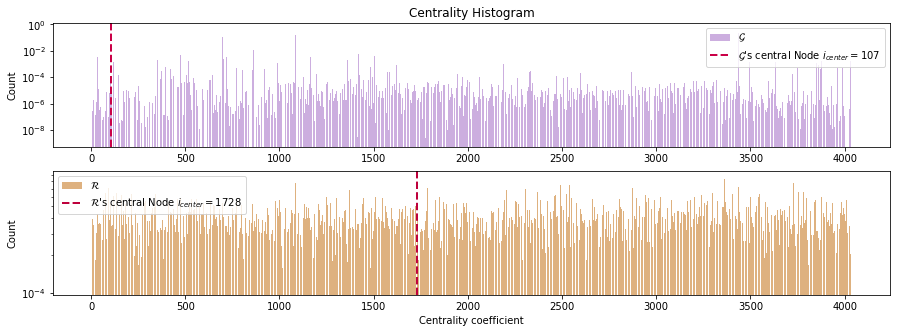

In [41]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
g_bar = plt.bar(center, cnt, alpha=0.5,width=0.80, color=random.choice(colors), log=True, label=r'$\mathcal{G}$')
g_central_line = plt.axvline(central_node, color=random.choice(colors), linestyle='dashed', 
            linewidth=2, label=r"$\mathcal{G}$'s central Node $i_{center} = $" + str(central_node), visible=True)
plt.legend(handles=[g_bar, g_central_line])
plt.title("Centrality Histogram")
plt.ylabel("Count")
plt.subplot(2, 1, 2)
r_bar = plt.bar(r_center, r_cnt, width=0.80, alpha=0.5, color=random.choice(colors), log=True, label=r'$\mathcal{R}$')
r_central_line = plt.axvline(r_central_node, color=random.choice(colors), linestyle='dashed', 
            linewidth=2, label=r"$\mathcal{R}$'s central Node $i_{center} = $" + str(r_central_node), visible=True)
plt.ylabel("Count")
plt.xlabel("Centrality coefficient")
plt.legend(handles=[r_bar,  r_central_line])
plt.show()

##### PageRank

###### Computation

In [8]:
import scipy
pagerank = nx.pagerank_scipy(G,)
nodes, cnt = zip(*pagerank.items())
pagerank_node = max(pagerank, key=pagerank.get)
r_pagerank = nx.pagerank_scipy(R,)
r_nodes, r_cnt = zip(*r_pagerank.items())
r_pagerank_node = max(r_pagerank, key=r_pagerank.get)

In [9]:
np.unique([x-y for x, y in zip(cnt, r_cnt)])

array([-0.0002827 , -0.00027431, -0.00026395, ...,  0.00613261,
        0.00674555,  0.00729328])

###### PageRank Histogram

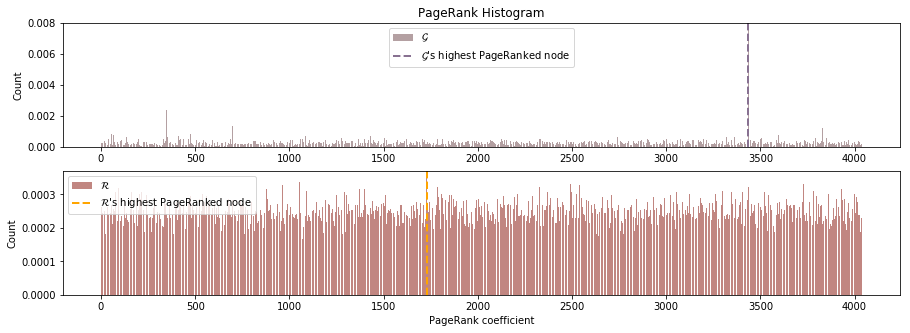

In [10]:
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

#fig, ax = plt.subplots()
plt.subplot(2, 1, 1)
g_bar = plt.bar(nodes, cnt, width=0.80, alpha=0.5,color=random.choice(colors), log=False, label=r'$\mathcal{G}$')
pagerank_line = plt.axvline(pagerank_node, color=random.choice(colors), linestyle='dashed',
            linewidth=2, label=r"$\mathcal{G}$'s highest PageRanked node", visible=True)
plt.title("PageRank Histogram")
plt.ylabel("Count")
plt.legend(handles=[g_bar, pagerank_line])
plt.subplot(2, 1, 2)
r_bar = plt.bar(r_nodes, r_cnt, width=0.80, alpha=0.5,color=random.choice(colors), log=False, label=r'$\mathcal{R}$')
r_pagerank_line = plt.axvline(r_pagerank_node, color=random.choice(colors), linestyle='dashed',
            linewidth=2, label=r"$\mathcal{R}$'s highest PageRanked node", visible=True)
plt.xlabel("PageRank coefficient")
plt.ylabel("Count")
plt.legend(handles=[r_bar, r_pagerank_line])
plt.show()

In [11]:
np.average(r_cnt), np.max(r_cnt), np.min(r_cnt)

(0.0002475860361475613, 0.0003516315294908382, 0.00014761038486476078)

In [12]:
np.average(cnt), np.max(cnt), np.min(cnt)

(0.00024758603614756134, 0.007614586844749601, 4.1526902883585566e-05)